このスクリプトは、ネットワーク内で偽情報と修正情報の拡散をシミュレートします。スクリプトの変更によって、偽情報と修正情報の拡散のダイナミクスに影響を与えます。以下に、各変更の具体的な効果を説明します。<br>

**偽情報を拡散する確率を 0.6 に設定**<br>
偽情報の各線確立を 0.6 に設定することで爆発的拡散をシミュレートします。<br>

**修正情報拡散の確率を 0.1 に設定**<br>
修正情報拡散確率を 0.1 に設定することで修正情報が拡散されます。これにより、ネットワーク内での修正情報の影響力が増し、偽情報の拡散を抑制する効果が期待できます。<br>

**修正情報提供者に再編されるための影響数を 1 に設定**<br>
影響数を 1 に設定することで、修正情報提供者からの影響を受けたノードが、容易に修正情報提供者に変わるようになります。これは修正情報の拡散を加速し、ネットワーク全体における修正情報の割合を増加させることが期待されます。<br>

**最も次数の高いノードを偽情報発信者に設定する**<br>
最も次数の高いノードの上位3つからランダムに一つを選び、偽情報発信者に設定することで、インフルエンサーの影響力を反映することが期待できます。<br>

**エッジに符号（正または負）を追加**<br>
エッジに符号を持たせることでネットワークの関係性（正＝ポジティブ、負＝ネガティブ）を考慮した情報拡散が可能になります。これによりネットワークのリアリズムが向上し、より複雑な情報拡散のシナリオをシミュレーションできます。<br>

**ベイズ更新を用いた情報の拡散**<br>
ベイズ更新を用いることで、各ノードの偽情報および修正情報拡散確率が動的に変化します。より現実的な情報拡散モデルを提供し、ノードが新しい情報を受け取るたびにその確率を更新することで、ネットワーク内の情報拡散パターンが複雑化します。<br>

これらの変更は、以下のような具体的な効果をもたらす可能性があります。

**偽情報の抑制：** 修正情報拡散の確率が上がることで、偽情報の拡散が抑制される可能性があります。<br>
**情報拡散のリアリズム向上：** エッジに符号を追加し、ノードの信頼度を考慮することで、ネットワーク内の関係性を考慮した情報拡散が可能になり、より現実的なシナリオをシミュレートできます。具体的には、信頼度の高いノードからの情報はより広がりやすく、信頼度の低いノードからの情報は広がりにくくなります。<br>
**ダイナミックな情報拡散パターン：** ベイズ更新を導入することで、ノードの情報拡散確率が動的に変化し、複雑な拡散パターンを観察できます。これにより、ネットワーク内での情報拡散の挙動をより詳細かつ現実的に理解することができます。<br>

また、このスクリプトでは、修正情報発信者（correction spreaders）はシミュレーションの開始時に設定されますが、修正情報の発信自体は特定のイテレーション数が経過するまでは行われません。そのため、シミュレーションの最初の段階では偽情報が広まりやすくなり、設定した遅延が経過した後に修正情報が発信され始めるという流れになります。具体的なストーリーとして考えられるのは以下の通りです。<br>

**イテレーション 1：** 修正情報発信者が存在するが、修正情報はまだ発信されない。偽情報発信者が偽情報を拡散し始める。<br>
**イテレーション 2-4：** 偽情報が拡散し続ける。修正情報はまだ発信されない。<br>
**イテレーション 5（iteration_delay の経過後）：** 修正情報の発信が始まる。偽情報と修正情報の拡散が同時に進行する。
**以降のイテレーション：** 偽情報と修正情報がノード間で競い合いながら拡散される。<br>

このシミュレーションにより、偽情報が初期段階で爆発的に広まる様子を観察し、その後修正情報がそれをどのように抑制していくかを確認できます。この設定は、実際のソーシャルネットワークにおける情報拡散の動態をより現実的に再現するための一つの方法です。

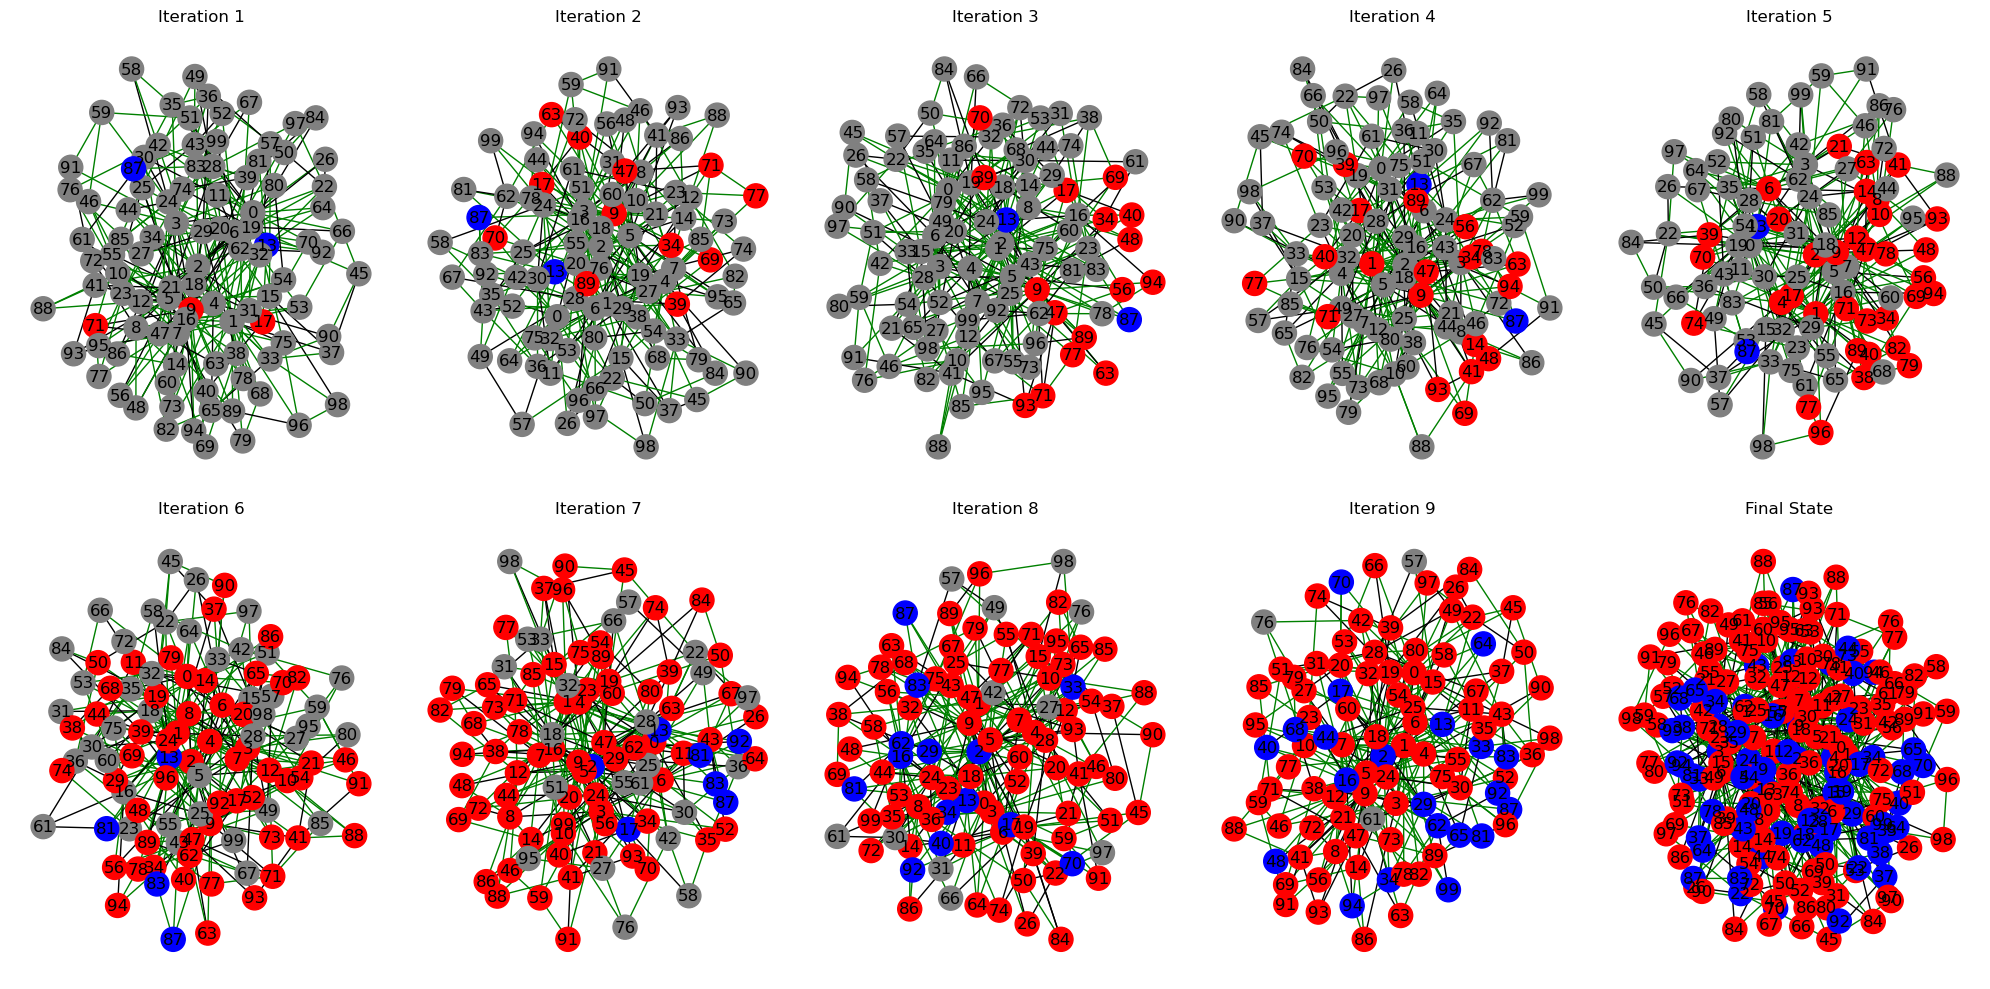

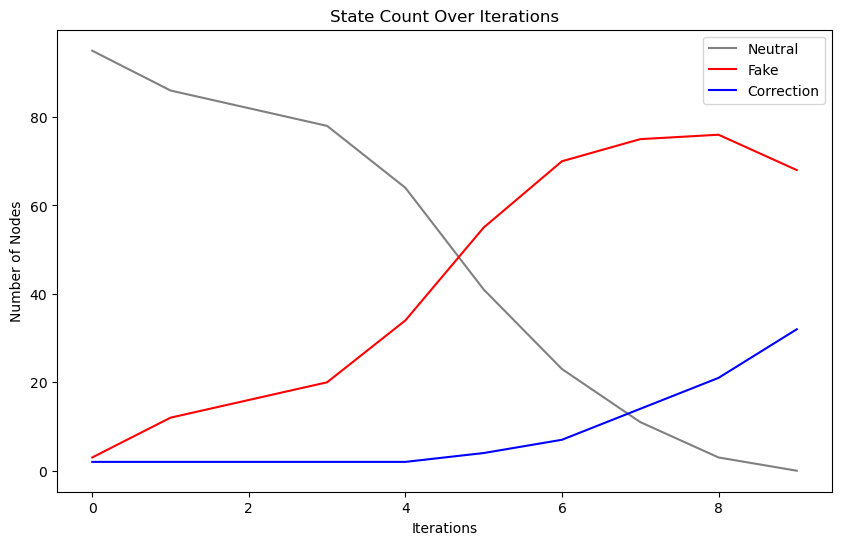

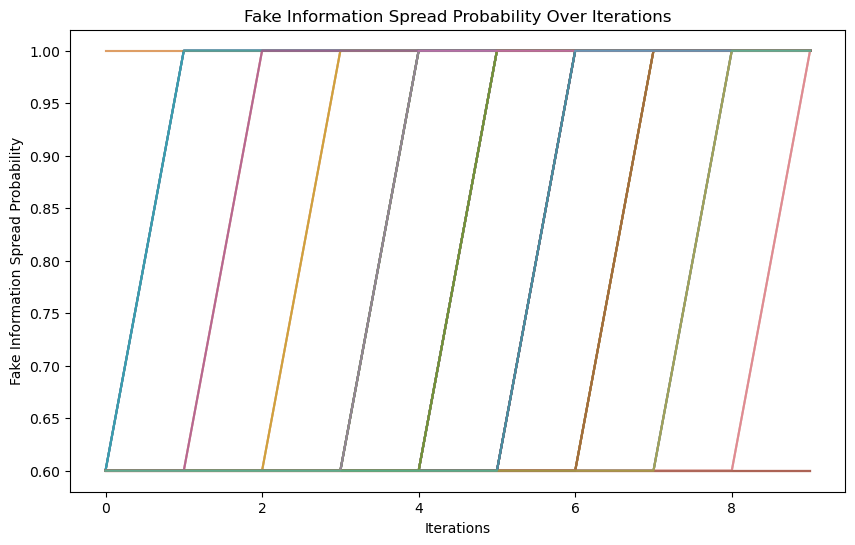

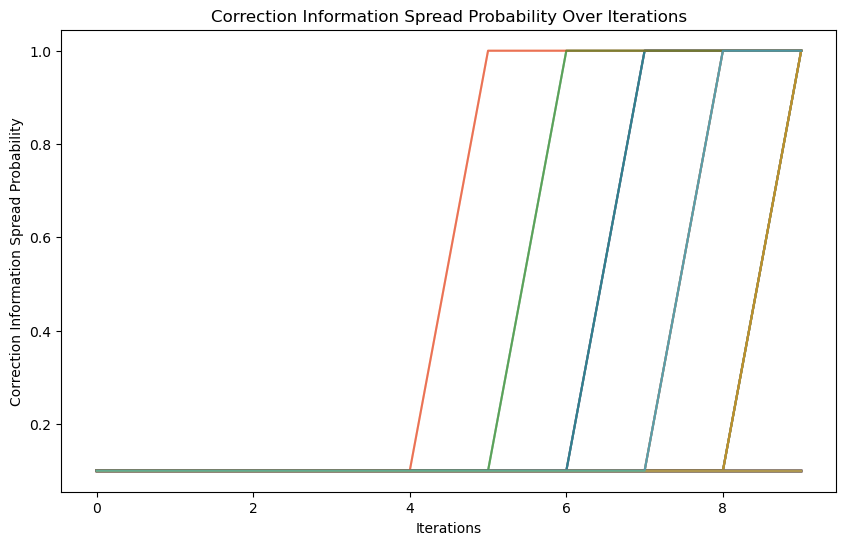

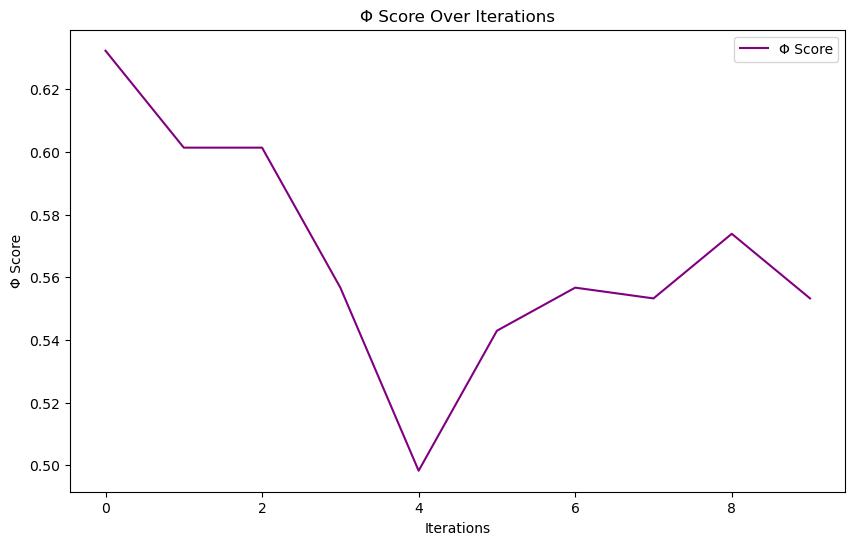

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# パラメータ設定
num_nodes = 100  # エージェントの数
initial_correction_spreaders = 2  # 修正情報を拡散するエージェントの初期数
fake_spread_prob = 0.6  # 偽情報を拡散する確率
correction_spread_prob = 0.1  # 修正情報を拡散する確率
iterations = 10  # シミュレーションの反復回数
iteration_delay = 5  # 修正情報の発信を開始するイテレーション数の遅延

# スケールフリーなソーシャルネットワークの生成
G = nx.barabasi_albert_graph(num_nodes, 3)

# エッジに符号（正または負）を追加
positive_ratio = 0.7
negative_ratio = 0.3

for u, v in G.edges:
    if random.random() < positive_ratio:
        G.edges[u, v]['sign'] = 1
    else:
        G.edges[u, v]['sign'] = -1

# ノードの属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = 'neutral'
    G.nodes[node]['fake_prob'] = fake_spread_prob
    G.nodes[node]['correction_prob'] = correction_spread_prob
    G.nodes[node]['trust'] = random.uniform(0.5, 1.0)  # 信頼度をランダムに設定

# グラフを可視化する関数
def visualize_graph(G, title, ax):
    color_map = {'neutral': 'gray', 'fake': 'red', 'correction': 'blue'}
    edge_color_map = {1: 'green', -1: 'black'}
    colors = [color_map[G.nodes[node]['state']] for node in G.nodes]
    edge_colors = [edge_color_map[G.edges[edge]['sign']] for edge in G.edges]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=True, node_size=300, ax=ax)
    ax.set_title(title)

# 次数の高いノードを特定し、最も次数の高いノードの一つを偽情報発信者に設定する
highest_degree_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
highest_degree_node = random.choice(highest_degree_nodes[:3])[0]  # 上位3つからランダムに選択
G.nodes[highest_degree_node]['state'] = 'fake'
initial_fake_nodes = [highest_degree_node]

# 初期の修正情報発信者を設定する関数
def set_initial_correction_spreaders(G, initial_correction_spreaders):
    neutral_nodes = [node for node in G.nodes if G.nodes[node]['state'] == 'neutral']
    chosen_nodes = random.sample(neutral_nodes, initial_correction_spreaders)
    for node in chosen_nodes:
        G.nodes[node]['state'] = 'correction'

# ベイズ更新を用いた情報の拡散を行う関数
def bayesian_update(prior, likelihood, evidence):
    return (likelihood * prior) / ((likelihood * prior) + ((1 - evidence) * (1 - prior)))

# 情報の拡散を行う関数
def spread_information(G, iteration, delay):
    new_states = {}
    for node in G.nodes:
        if G.nodes[node]['state'] == 'neutral':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'fake':
                    # 信頼度を考慮した偽情報の拡散確率
                    adjusted_fake_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['fake_prob']
                    G.nodes[node]['fake_prob'] = bayesian_update(G.nodes[node]['fake_prob'], adjusted_fake_prob, 1)
                    if random.random() < G.nodes[node]['fake_prob']:
                        new_states[node] = 'fake'
                elif G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
        elif G.nodes[node]['state'] == 'fake':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
    
    for node, new_state in new_states.items():
        G.nodes[node]['state'] = new_state

# 状態数をカウントする関数
def count_states(G):
    state_count = {'neutral': 0, 'fake': 0, 'correction': 0}
    for node in G.nodes:
        state = G.nodes[node]['state']
        state_count[state] += 1
    return state_count

# 各ノードの確率を記録するための関数
def record_probabilities(G, fake_probs, correction_probs):
    fake_probs.append([G.nodes[node]['fake_prob'] for node in G.nodes])
    correction_probs.append([G.nodes[node]['correction_prob'] for node in G.nodes])

# 符号付きネットワークのバランスを評価するΦメソッド
def phi_method(G):
    balanced_edges = 0
    total_edges = len(G.edges)
    for u, v in G.edges:
        if G.edges[u, v]['sign'] == 1 and G.nodes[u]['state'] == G.nodes[v]['state']:
            balanced_edges += 1
        elif G.edges[u, v]['sign'] == -1 and G.nodes[u]['state'] != G.nodes[v]['state']:
            balanced_edges += 1
    return balanced_edges / total_edges

# 初期の修正情報発信者を設定
set_initial_correction_spreaders(G, initial_correction_spreaders)

# シミュレーションの実行と状態数の記録
state_counts = {'neutral': [], 'fake': [], 'correction': []}
fake_probabilities = []
correction_probabilities = []
phi_scores = []

fig, axs = plt.subplots(2, (iterations + 1) // 2, figsize=(20, 10))
axs = axs.flatten()

for i in range(iterations):
    spread_information(G, i, iteration_delay)
    current_state_count = count_states(G)
    for state, count in current_state_count.items():
        state_counts[state].append(count)
    record_probabilities(G, fake_probabilities, correction_probabilities)
    phi_score = phi_method(G)
    phi_scores.append(phi_score)
    visualize_graph(G, f"Iteration {i + 1}", axs[i])

# 最終状態の可視化
visualize_graph(G, "Final State", axs[-1])
plt.tight_layout()
plt.show()

# イテレーションごとの状態数をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), state_counts['neutral'], label='Neutral', color='gray')
plt.plot(range(iterations), state_counts['fake'], label='Fake', color='red')
plt.plot(range(iterations), state_counts['correction'], label='Correction', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Number of Nodes')
plt.title('State Count Over Iterations')
plt.legend()
plt.show()

# 確率の変化をプロットする
plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [fake_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Fake Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Fake Information Spread Probability')
plt.title('Fake Information Spread Probability Over Iterations')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [correction_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Correction Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Correction Information Spread Probability')
plt.title('Correction Information Spread Probability Over Iterations')
plt.show()

# Φスコアの変化をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), phi_scores, label='Φ Score', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Φ Score')
plt.title('Φ Score Over Iterations')
plt.legend()
plt.show()
